# 유튜브 동영상 동향 분석

유튜브는 오늘날 세계에서 가장 인기있고 가장 많이 사용되는 동영상이다. 유튜브에는 끊임없이 업데이트되는 최신 동영상 목록이 있다. 여기서는 Python을 Pandas, Matplotlib와 같은 패키지와 함께 사용하여 205일 동안 수집된 데이터 세트를 분석할 것이다. 그 날의 데이터 세트에는 그 날의 트렌드 비디오에 대한 데이터가 포함되어 있다. 약 4만 건 이상의 트렌드 비디오를 담고 있다. 우리는 이 데이터를 분석해서 유튜브 트렌드 비디오에 대한 통찰력을 얻고, 이 비디오들 사이의 공통점을 볼 것이다. 이러한 통찰력은 유튜브에서 자신들의 동영상의 인기를 높이려는 사람들에 의해서도 이용될 수 있다.
우리가 사용할 데이터 세트는 여기 있는 Kaggle에서 얻은 것이다. 그것은 많은 나라들의 최신 비디오에 대한 데이터를 포함하고 있다. 여기서 우리는 미국의 트렌드 비디오를 분석할 것이다.


**Data**

*   매일 유튜브 동영상에 대한 몇 달의 데이터를 포함함
*   US, GB, DE, CA, FR, KR, JP, MX, RU(미국, 영국, 독일, 캐나다, 프랑스, 한국, 일본, 멕시코, 러시아)에 대해 포함하며, 하루에 최대 200개의 비디오를 나열함.
*  각 지역에 데이터는 별도의 파일이 있으며, 제목(title), 채널 제목(channel title), 게시 시간(publish time), 태그(tags), 좋아요(likes) 및 싫어요(dislikes) 수가 포함됨.
*   지역마다 다른 category_id 필드를 포함하고 특정 비디오의 범주를 검색하려면 관련 JSON(파일)에서 찾으시오, 특정 열에 대한 자세한 내용은 열 metadata를 참조하시오.


**Inspiration**

Possible uses for this dataset could include:
Sentiment analysis in a variety of forms
Categorising YouTube videos based on their comments and statistics.
Training ML algorithms like RNNs to generate their own YouTube comments.
Analysing what factors affect how popular a YouTube video will be.
Statistical analysis over time

참고자료: https://www.kaggle.com/datasnaek/youtube-new/downloads/youtube-new.zip/115

In [ ]:
# EDA 분석하기, EDA에 관한 내용 참고하기

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [ ]:
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
df_us = pd.read_csv('USvideos.csv', encoding = 'utf-8')
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [ ]:
df_us.shape

(40949, 16)

In [ ]:
# 데이터 매핑하기, id 범주형데이터 활용
df_us_categories = pd.read_json('US_category_id.json')
df_us_categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [ ]:
df_us_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
kind     32 non-null object
etag     32 non-null object
items    32 non-null object
dtypes: object(3)
memory usage: 848.0+ bytes


In [ ]:
df_us_categories.shape

(32, 3)

In [ ]:
# 
categories = {int(category['id']): category['snippet']['title'] for category in df_us_categories['items']}
categories

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [ ]:
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# 첫번째 video_id == "2kyS6SvSYSE"인 행만 추려서 출력하기
df_us[df_us.video_id == "2kyS6SvSYSE"]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
217,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
448,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,21450,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
689,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2400741,92831,7687,21714,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
924,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2468267,94303,7802,21866,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1159,2kyS6SvSYSE,17.19.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2524854,95587,7892,22038,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1383,2kyS6SvSYSE,17.20.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2564903,96321,7972,22149,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [ ]:
df_us.category_id = df_us.category_id.astype('category')
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null category
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), category(1), int64(4), object(8)
memory usage: 3.9+ MB


In [ ]:
df_us.describe(include=[np.object])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,18.16.04,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


In [ ]:
# Summary of Boolean Variables

df_us.select_dtypes(include=[np.bool]).apply(pd.Series.value_counts,dropna=False)

,comments_disabled,ratings_disabled,video_error_or_removed
False,40316,40780,40926
True,633,169,23


In [ ]:

#
df_us.describe(percentiles=[.05,.25,.5,.75,.95]).round(1)

,views,likes,dislikes,comment_count
count,40949.0,40949.0,40949.0,40949.0
mean,2360784.6,74266.7,3711.4,8446.8
std,7394113.8,228885.3,29029.7,37430.5
min,549.0,0.0,0.0,0.0
5%,30390.0,316.0,22.0,49.0
25%,242329.0,5424.0,202.0,614.0
50%,681861.0,18091.0,631.0,1856.0
75%,1823157.0,55417.0,1938.0,5755.0
95%,9017287.0,307402.6,11807.8,30783.0
max,225211923.0,5613827.0,1674420.0,1361580.0


In [ ]:
# 동영상 카테고리 

counter = 0

for f, v in categories.items():
  print('{:2d}: {:24}'.format(f, v), end = '')
  count = +1
  if counter % 4 == 0:
        print()
print('\n{} Categories in Total.'.format(counter))

 1: Film & Animation        
 2: Autos & Vehicles        
10: Music                   
15: Pets & Animals          
17: Sports                  
18: Short Movies            
19: Travel & Events         
20: Gaming                  
21: Videoblogging           
22: People & Blogs          
23: Comedy                  
24: Entertainment           
25: News & Politics         
26: Howto & Style           
27: Education               
28: Science & Technology    
29: Nonprofits & Activism   
30: Movies                  
31: Anime/Animation         
32: Action/Adventure        
33: Classics                
34: Comedy                  
35: Documentary             
36: Drama                   
37: Family                  
38: Foreign                 
39: Horror                  
40: Sci-Fi/Fantasy          
41: Thriller                
42: Shorts                  
43: Shows                   
44: Trailers                

0 Categories in Total.


In [ ]:
# 데이터 전처리, 데이터 변수 변경
# Transform trending_date to datetime date format

df_us['trending_date'] = pd.to_datetime(df_us['trending_date'], format='%y.%d.%m').dt.date
df_us.trending_date.value_counts().sort_index(inplace=True)
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# 데이터를 trending_date로 정령시킴
pd.Index(df_us.trending_date).is_monotonic

True

In [ ]:
# Publish Time

# publish_time을 datetime으로 변환시킴
publish_time = pd.to_datetime(df_us.publish_time, format='%Y-%m-%dT%H:%M:%S.%fZ')

df_us['publish_date'] = publish_time.dt.date

df_us.drop('publish_time', axis=1,inplace=True)

In [ ]:
# Create New Variable Counting Days to Achieving Trending Status( 새로운 변수를 trending상태로 만든다)
df_us['days_to_trending'] = (df_us.trending_date - df_us.publish_date).dt.days


df_us.days_to_trending.describe(percentiles=[.05,.25,.5,.75,.95])

count    40949.000000
mean        16.810423
std        146.014303
min          0.000000
5%           1.000000
25%          3.000000
50%          5.000000
75%          9.000000
95%         17.000000
max       4215.000000
Name: days_to_trending, dtype: float64

In [ ]:
# 새로운 데이터프레임 생성하기 'trending_data', 'video_id'
df_us.set_index(['trending_date','video_id'],inplace=True)
df_us.head()

title  ... days_to_trending
trending_date video_id                                                        ...                 
2017-11-14    2kyS6SvSYSE                 WE WANT TO TALK ABOUT OUR MARRIAGE  ...                1
              1ZAPwfrtAFY  The Trump Presidency: Last Week Tonight with J...  ...                1
              5qpjK5DgCt4  Racist Superman | Rudy Mancuso, King Bach & Le...  ...                2
              puqaWrEC7tY                   Nickelback Lyrics: Real or Fake?  ...                1
              d380meD0W0M                           I Dare You: GOING BALD!?  ...                2

[5 rows x 15 columns]

In [ ]:
# 싫어요 퍼센트 확인하기
df_us['dislike_percentage'] = df_us['dislikes'] / (df_us['dislikes'] + df_us['likes'])


df_us.dislike_percentage.describe(percentiles=[.05,.25,.5,.75,.95])

count    40779.000000
mean         0.066887
std          0.102317
min          0.000000
5%           0.007177
25%          0.017210
50%          0.033012
75%          0.069669
95%          0.250307
max          1.000000
Name: dislike_percentage, dtype: float64

In [ ]:
# 데이터 정제하기, 'video_error_or_removed' == True을 어떻게 해석할까?

print(df_us[df_us.video_error_or_removed])


df_us = df_us[~df_us.video_error_or_removed]

                                                                       title  ... dislike_percentage
trending_date video_id                                                        ...                   
2017-11-25    RK_B4Ez4_5Q  Verizon 360 Live: The Macy’s Thanksgiving Day ...  ...           0.048725
2018-02-01    kZete48ZtsY                                      Deleted video  ...           0.024767
2018-02-02    kZete48ZtsY                                      Deleted video  ...           0.600000
2018-02-03    kZete48ZtsY                                      Deleted video  ...           0.600000
2018-04-23    q8v9MvManKE                       Earth Day 2018 Google Doodle  ...           0.028339
2018-04-24    q8v9MvManKE                       Earth Day 2018 Google Doodle  ...           0.043696
2018-04-25    q8v9MvManKE                       Earth Day 2018 Google Doodle  ...           0.046980
2018-04-26    q8v9MvManKE                       Earth Day 2018 Google Doodle  ...          

In [ ]:
# 새로운 데이터프레임 video level status

video_level = df_us.groupby(level=1).first()
video_level['freq'] = df_us['title'].groupby(level=1).count()

video_level['category'] = [categories[cid] for cid in video_level.category_id]
video_level.drop('category_id',axis=1,inplace=True)

video_level.sort_values(by=['views'],ascending=False,inplace=True)

video_level['views_ratio'] = df_us['views'].groupby(level=1).last() / video_level.views

views_min_dt = pd.Series([t[0] for t in df_us['views'].groupby(level=1).idxmin()],index=video_level.index)

video_level['views_min_dt'] = views_min_dt
video_level.head(10)

,title,channel_title,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,days_to_trending,dislike_percentage,freq,category,views_ratio,views_min_dt
video_id,,,,,,,,,,,,,,,,,,,
-BQJo3vK8O8,Maluma - El Préstamo (Official Video),MalumaVEVO,"Maluma Music|""Maluma Official Video""|""Maluma V...",48431654,609101,52259,29172,https://i.ytimg.com/vi/-BQJo3vK8O8/default.jpg,False,False,False,Maluma - El Prestamo (Official Music Video)\nE...,2018-03-09,6,0.079017,11,Music,1.801806,2018-06-06
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",39349927,3880071,72707,692305,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,2018-05-18,1,0.018394,14,Music,3.126077,2018-02-01
i0p1bmr0EmE,TWICE What is Love? M/V,jypentertainment,"TWICE What is Love|""TWICE What is Love?""|""TWIC...",38873543,1111592,96407,206632,https://i.ytimg.com/vi/i0p1bmr0EmE/default.jpg,False,False,False,TWICE(트와이스) What is Love? M/V\n\nSpotify https...,2018-04-09,5,0.079807,14,Music,1.782588,2018-04-29
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",37736281,1735895,21969,241237,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...,2017-11-29,1,0.012498,9,Entertainment,2.436197,2017-11-29
2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,2017-11-09,5,0.012737,3,Music,1.296091,2017-11-14
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",31648454,1405355,51547,149473,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,2018-05-06,2,0.035381,25,Music,7.116048,2018-04-27
u9Mv98Gr5pY,VENOM - Official Trailer (HD),Sony Pictures Entertainment,"Venom|""Venom Movie""|""Venom (2018)""|""Marvel""|""M...",27973210,850362,26541,96767,https://i.ytimg.com/vi/u9Mv98Gr5pY/default.jpg,False,False,False,We Are #Venom. 10.5.18\n\nOne of Marvel's most...,2018-04-24,1,0.030267,19,Entertainment,2.118264,2017-12-20
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",24782158,1149185,483924,462103,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",2017-12-06,1,0.296321,8,Entertainment,6.027567,2018-02-14
U9BwWKXjVaI,Drake - Nice For What,DrakeVEVO,"Drake|""Nice""|""For""|""What""|""Young""|""Money""|""Hip...",24421448,641546,16517,42949,https://i.ytimg.com/vi/U9BwWKXjVaI/default.jpg,False,False,False,Music video by Drake performing Nice For What....,2018-04-07,7,0.025099,14,Music,2.482892,2018-02-15


In [ ]:
video_level.describe(percentiles=[.05,.25,.5,.75,.95])

,views,likes,dislikes,comment_count,days_to_trending,dislike_percentage,freq,views_ratio
count,6.348000e+03,6.348000e+03,6348.000000,6348.000000,6348.000000,6323.000000,6348.000000,6348.000000
mean,7.579615e+05,3.449635e+04,1426.883743,4502.068841,22.530088,0.066446,6.447070,2.833161
std,1.929302e+06,1.162709e+05,12081.620395,21465.278339,210.012500,0.107855,4.643069,5.956427
min,5.490000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.546818
5%,8.696350e+03,7.800000e+01,5.000000,12.000000,1.000000,0.005491,1.000000,1.000000
25%,8.349450e+04,1.906000e+03,72.000000,261.000000,1.000000,0.014085,3.000000,1.194326
50%,2.707260e+05,7.986000e+03,241.000000,920.000000,2.000000,0.028989,6.000000,1.627962
75%,7.508708e+05,2.514275e+04,762.250000,2842.500000,3.000000,0.066726,8.000000,2.532371
95%,2.803701e+06,1.323305e+05,4140.800000,15764.150000,6.000000,0.273235,15.000000,7.178937
max,4.843165e+07,3.880071e+06,629120.000000,733373.000000,4215.000000,1.000000,30.000000,204.047247


# Quick Stats for Top 10 Videos

In [ ]:
from IPython.display import HTML, display

In [ ]:
# First Occurrence of the 10 longest lasting videos by days on list and first views count
tmp = video_level.sort_values(by=['freq','views'],ascending=False).head(10)

In [ ]:
# Construction of HTML table with miniature photos assigned to the most popular videos
table = '<h1>Trending the Longest by Days Trending and Initial Views</h1><table>'


In [ ]:

# Add Header
table += '<tr>'
table += '<th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th>'
table += '<th>Days Trending</th><th>Views</th>'
table += '</tr>'

max_title_length = 50

In [ ]:
#
for video_id, row in tmp.iterrows():
    table += '<tr>'
    table += '<td><img src="{thumbnail_link}" style="width:100px;height:100px;"></td>'.format(**row)
    table += '<td>{channel_title}</td>'.format(**row)
    table += '<td>{title}</td>'.format(**row)
    table += '<td>{category}</td>'.format(**row)
    table += '<td>{publish_date}</td>'.format(**row)
    table += '<td>{freq}</td>'.format(**row)
    table += '<td align="right">{views:11,d}</td>'.format(**row)
    table += '</tr>'  
table += '</table>'

display(HTML(table))


Photo,Channel Name,Title,Category,Publish Date,Days Trending,Views
,Lucas and Marcus,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Entertainment,2018-05-13,30,"2,131,702"
,Unbox Therapy,"The ULTIMATE $30,000 Gaming PC Setup",Science & Technology,2018-05-13,29,"4,700,460"
,grav3yardgirl,Why I'm So Scared (being myself and crying too much),Howto & Style,2018-05-14,29,"1,469,627"
,Complex,YoungBoy Never Broke Again Goes Sneaker Shopping With Complex,Entertainment,2018-05-14,29,"1,199,587"
,Charlie Puth,Charlie Puth - BOY [Official Audio],Music,2018-05-11,29,"981,789"
,杰威爾音樂 JVR Music,"周杰倫 Jay Chou【不愛我就拉倒 If You Don't Love Me, It's Fine】Official MV",Music,2018-05-14,29,"916,128"
,SamSmithWorldVEVO,Sam Smith - Pray (Official Video) ft. Logic,Music,2018-05-09,29,"641,944"
,Rooster Teeth,Rooster Teeth Animated Adventures - Millie So Serious,Film & Animation,2018-05-14,29,"404,162"
,nigahiga,FORTNITE The Movie (Official Fake Trailer),Entertainment,2018-05-11,28,"5,338,017"
,20th Century Fox,Bohemian Rhapsody | Teaser Trailer [HD] | 20th Century FOX,Film & Animation,2018-05-15,28,"4,215,671"


In [ ]:
#
tmp = video_level[['freq','days_to_trending']]

days_to_trending_max = df_us.groupby(level=1)[['days_to_trending']].max()

In [ ]:

tmp = tmp.join(days_to_trending_max,how='left',rsuffix='_max')
tmp['test'] = tmp.days_to_trending_max - tmp.days_to_trending + 1
print('{:.2%}'.format(sum([a==b for a,b in zip(tmp.freq,tmp.test)]) / len(tmp.index)))
tmp[tmp.test != tmp.freq].head()

91.35%


,freq,days_to_trending,days_to_trending_max,test
video_id,,,,
VYOjWnS4cMY,25,2,27,26
u9Mv98Gr5pY,19,1,20,20
rRr1qiJRsXk,18,1,20,20
ffxKSjUwKdU,20,1,24,24
V5cOvyDpWfM,7,2,9,8


# 데이터 시각화(Data Visualization)


In [ ]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7,8.27)})

tmp = df_us.channel_title.value_counts()[:25]

_ = sns.barplot(y=tmp.index,x=tmp)

NameError: ignored

In [ ]:
sns.set(font_scale=1.5,rc={'figure.figsize':(11.7, 8.27)})

sns_ax = sns.countplot([categories[i] for i in df_us.category_id])
_, labels = plt.xticks()
_ = sns_ax.set_xticklabels(labels, rotation=60)

plt.title('video category')

NameError: ignored

In [ ]:
# 시간에 따른 그래프 
table = pd.pivot_table(df_us, index=df_us.index.labels[0])
table.index = df_us.index.levels[0]

# 좋아요, 싫어요, 의견 수
_ = table[['likes','dislikes','comment_count']].plot()

# 시청 수
_ = table[['views']].plot()

# 불만 의견, 불만비율, 
_ = table[['comments_disabled','ratings_disabled','video_error_or_removed']].plot()


In [ ]:
# 날짜에 따른 trending 살펴보기 
max_days_to_trending = df_us.sample(1000).groupby('video_id').days_to_trending.max()

sns_ax = sns.boxplot(y=max_days_to_trending)
_ = sns_ax.set(yscale="log")
plt.show()
_ = sns.distplot(max_days_to_trending.value_counts(),bins='rice',kde=False)


In [ ]:
# distplot 그래프로 싫어요 퍼센트 살펴보기 
sns_ax = sns.distplot(np.nan_to_num(df_us.sample(1000).dislike_percentage),bins='fd')

_ = sns_ax.set_title('Distribution of Dislike Percentage')

In [ ]:
# 비디오 상관관계 살펴보기 
tmp = video_level.sample(1000)[['days_to_trending','dislike_percentage','likes','dislikes','views','views_ratio','freq']]

# trending 날짜 20일 미만으로
tmp = tmp[tmp.days_to_trending < 20]

# 조회수 기록, 싫어요, 조회수율
tmp['log_views'] = np.log10(tmp.views)
tmp['trans_dislike_pct'] = np.log(tmp.likes+1) - np.log(tmp.dislikes+1)
tmp['log_views_ratio'] = np.log(tmp.views_ratio)

_ = sns.pairplot(tmp[['days_to_trending','freq','log_views','log_views_ratio','trans_dislike_pct']],dropna=True)

In [ ]:
# 카테고리, 조회수에 따른 video_level box그래프

sns_ax = sns.boxplot(x='category',y='views',data=video_level)

_, labels = plt.xticks()
_ = sns_ax.set_xticklabels(labels, rotation=90)
_ = sns_ax.set_title('Views')
_ = sns_ax.set(yscale="log")

In [ ]:
# 카테고리, 조회율 video_level에 미치는 영향
sns_ax = sns.boxplot(x='category',y='views_ratio',data=video_level)

_, labels = plt.xticks()
_ = sns_ax.set_xticklabels(labels, rotation=90)
_ = sns_ax.set_title('Views Ratio')
_ = sns_ax.set(yscale="log")

# 데이터 마이닝

유튜브 비디오 트렌딩에 미치는 영향

*   항목 추가
*   항목 추가
*   항목 추가
*   항목 추가
*   항목 추가
*   항목 추
*   항목 추가
*   항목 추가

views
likes
dislikes
comment_count
dislike_percentage
days_to_trending
category

Category is our only categorical variable. As some data mining models we'll use do not tolerate categorical predictors, we transform category to a numeric variable as follows. Assuming that views_ratio median for each category does not vary in time, we introduce a new predictor, cat_ratio_median, that measures exactly that, each category's median views_ratio. To verify the validity of our approach, observe the bar plot below. Between quarter variability of views_ratio is generally low.

카데고리는 범주형 변수이다. 이러한 데이터 마이닝 모델은 우리에게 범주형적인 예측화하고, 수치적인 변수로 변형시킨다.

In [ ]:
#
tmp = video_level[(video_level.views_ratio < 10) & (video_level.freq > 1) & (video_level.views_ratio > .8)].dropna().sort_values(by='views_ratio')
cat_ratio_median = tmp.groupby('category')['views_ratio'].median()
tmp = tmp.merge(cat_ratio_median.rename('cat_ratio_median').to_frame(), left_on='category',right_index=True)


In [ ]:
#
y = np.log(tmp.views_ratio)
print('y')
print(y.describe(percentiles=[.05,.25,.5,.75,.95]))
X = tmp[['views','likes','dislikes','comment_count','dislike_percentage','days_to_trending','cat_ratio_median']]


y
count    5352.000000
mean        0.669888
std         0.515182
min        -0.135237
5%          0.069849
25%         0.266549
50%         0.538728
75%         0.946556
95%         1.742013
max         2.298001
Name: views_ratio, dtype: float64


In [ ]:
tmp_log = np.log(tmp[['views','likes','dislikes','comment_count','dislike_percentage','days_to_trending','cat_ratio_median','views_ratio']]+1)
X_reg = tmp_log[['views','likes','dislikes','comment_count','dislike_percentage','days_to_trending','cat_ratio_median']]
y_reg = tmp_log.views_ratio
print('y_reg')
print(y_reg.describe(percentiles=[.05,.25,.5,.75,.95]))

y_reg
count    5352.000000
mean        1.110707
std         0.365577
min         0.627813
5%          0.728681
25%         0.835277
50%         0.998359
75%         1.274474
95%         1.903424
max         2.393729
Name: views_ratio, dtype: float64


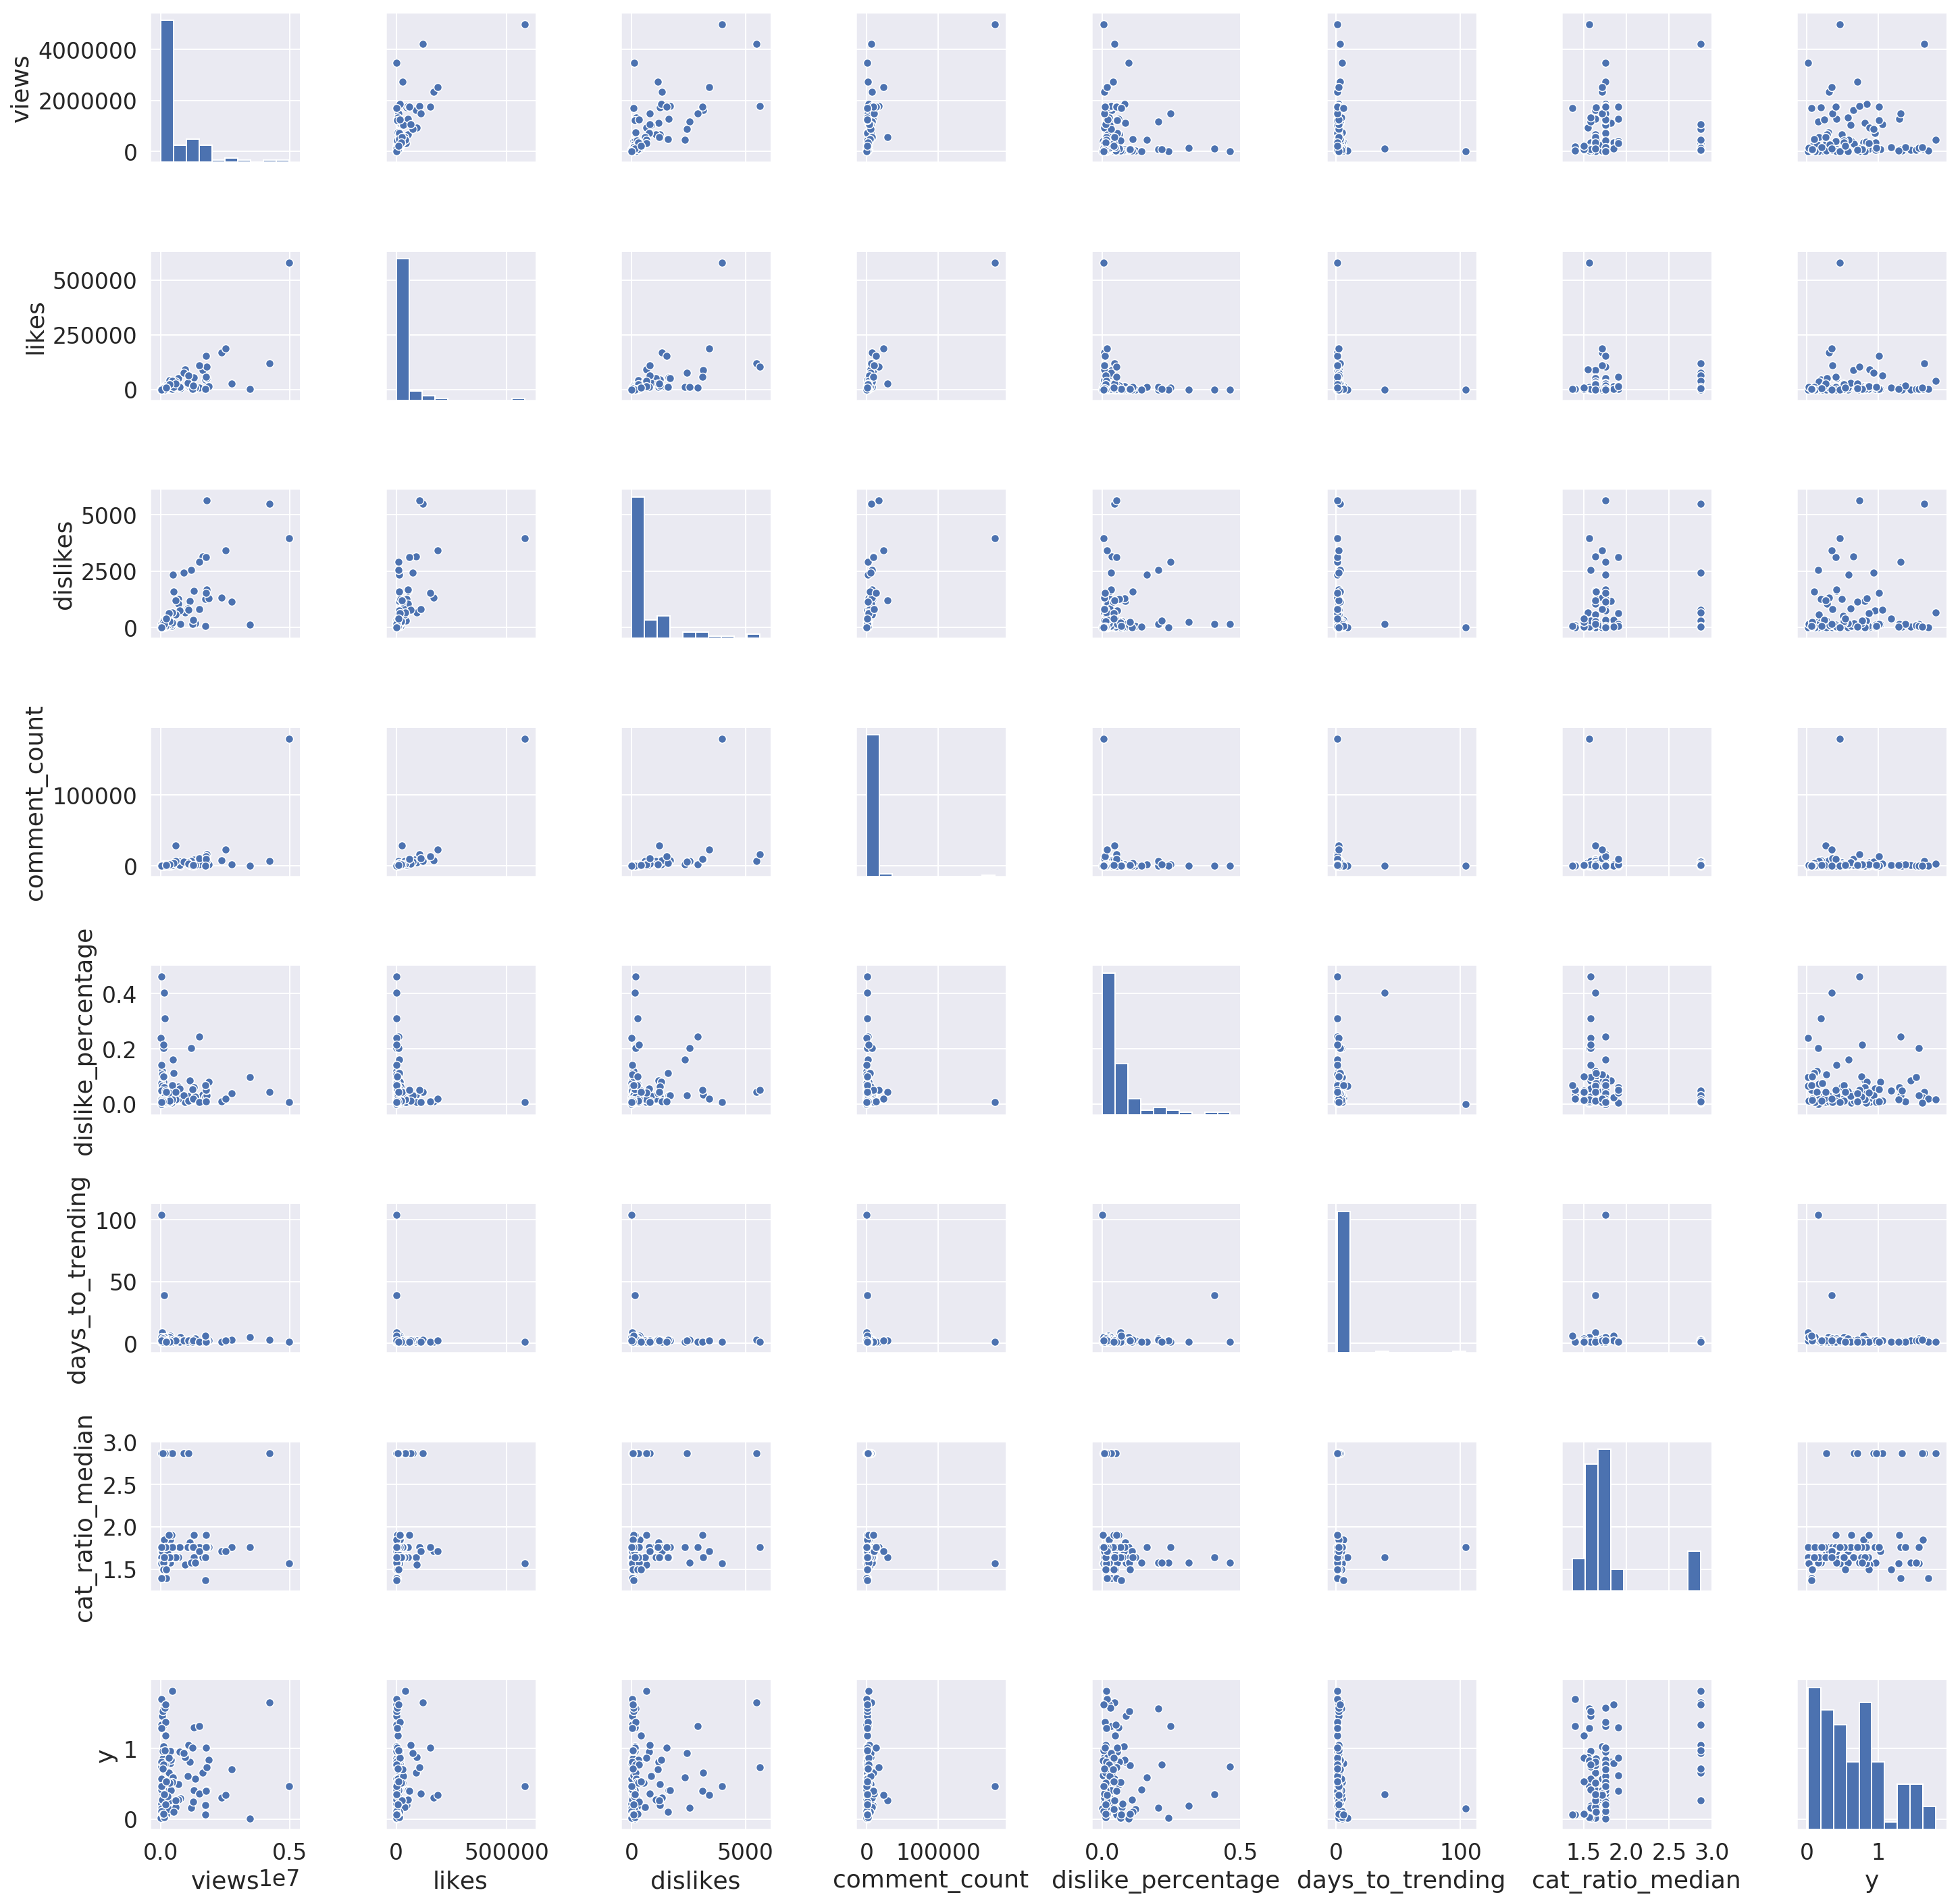

In [ ]:
# sample 100개로 넣어서 상관관계 확인
_ = sns.pairplot(pd.concat((X,y.rename('y')),axis=1).sample(100))

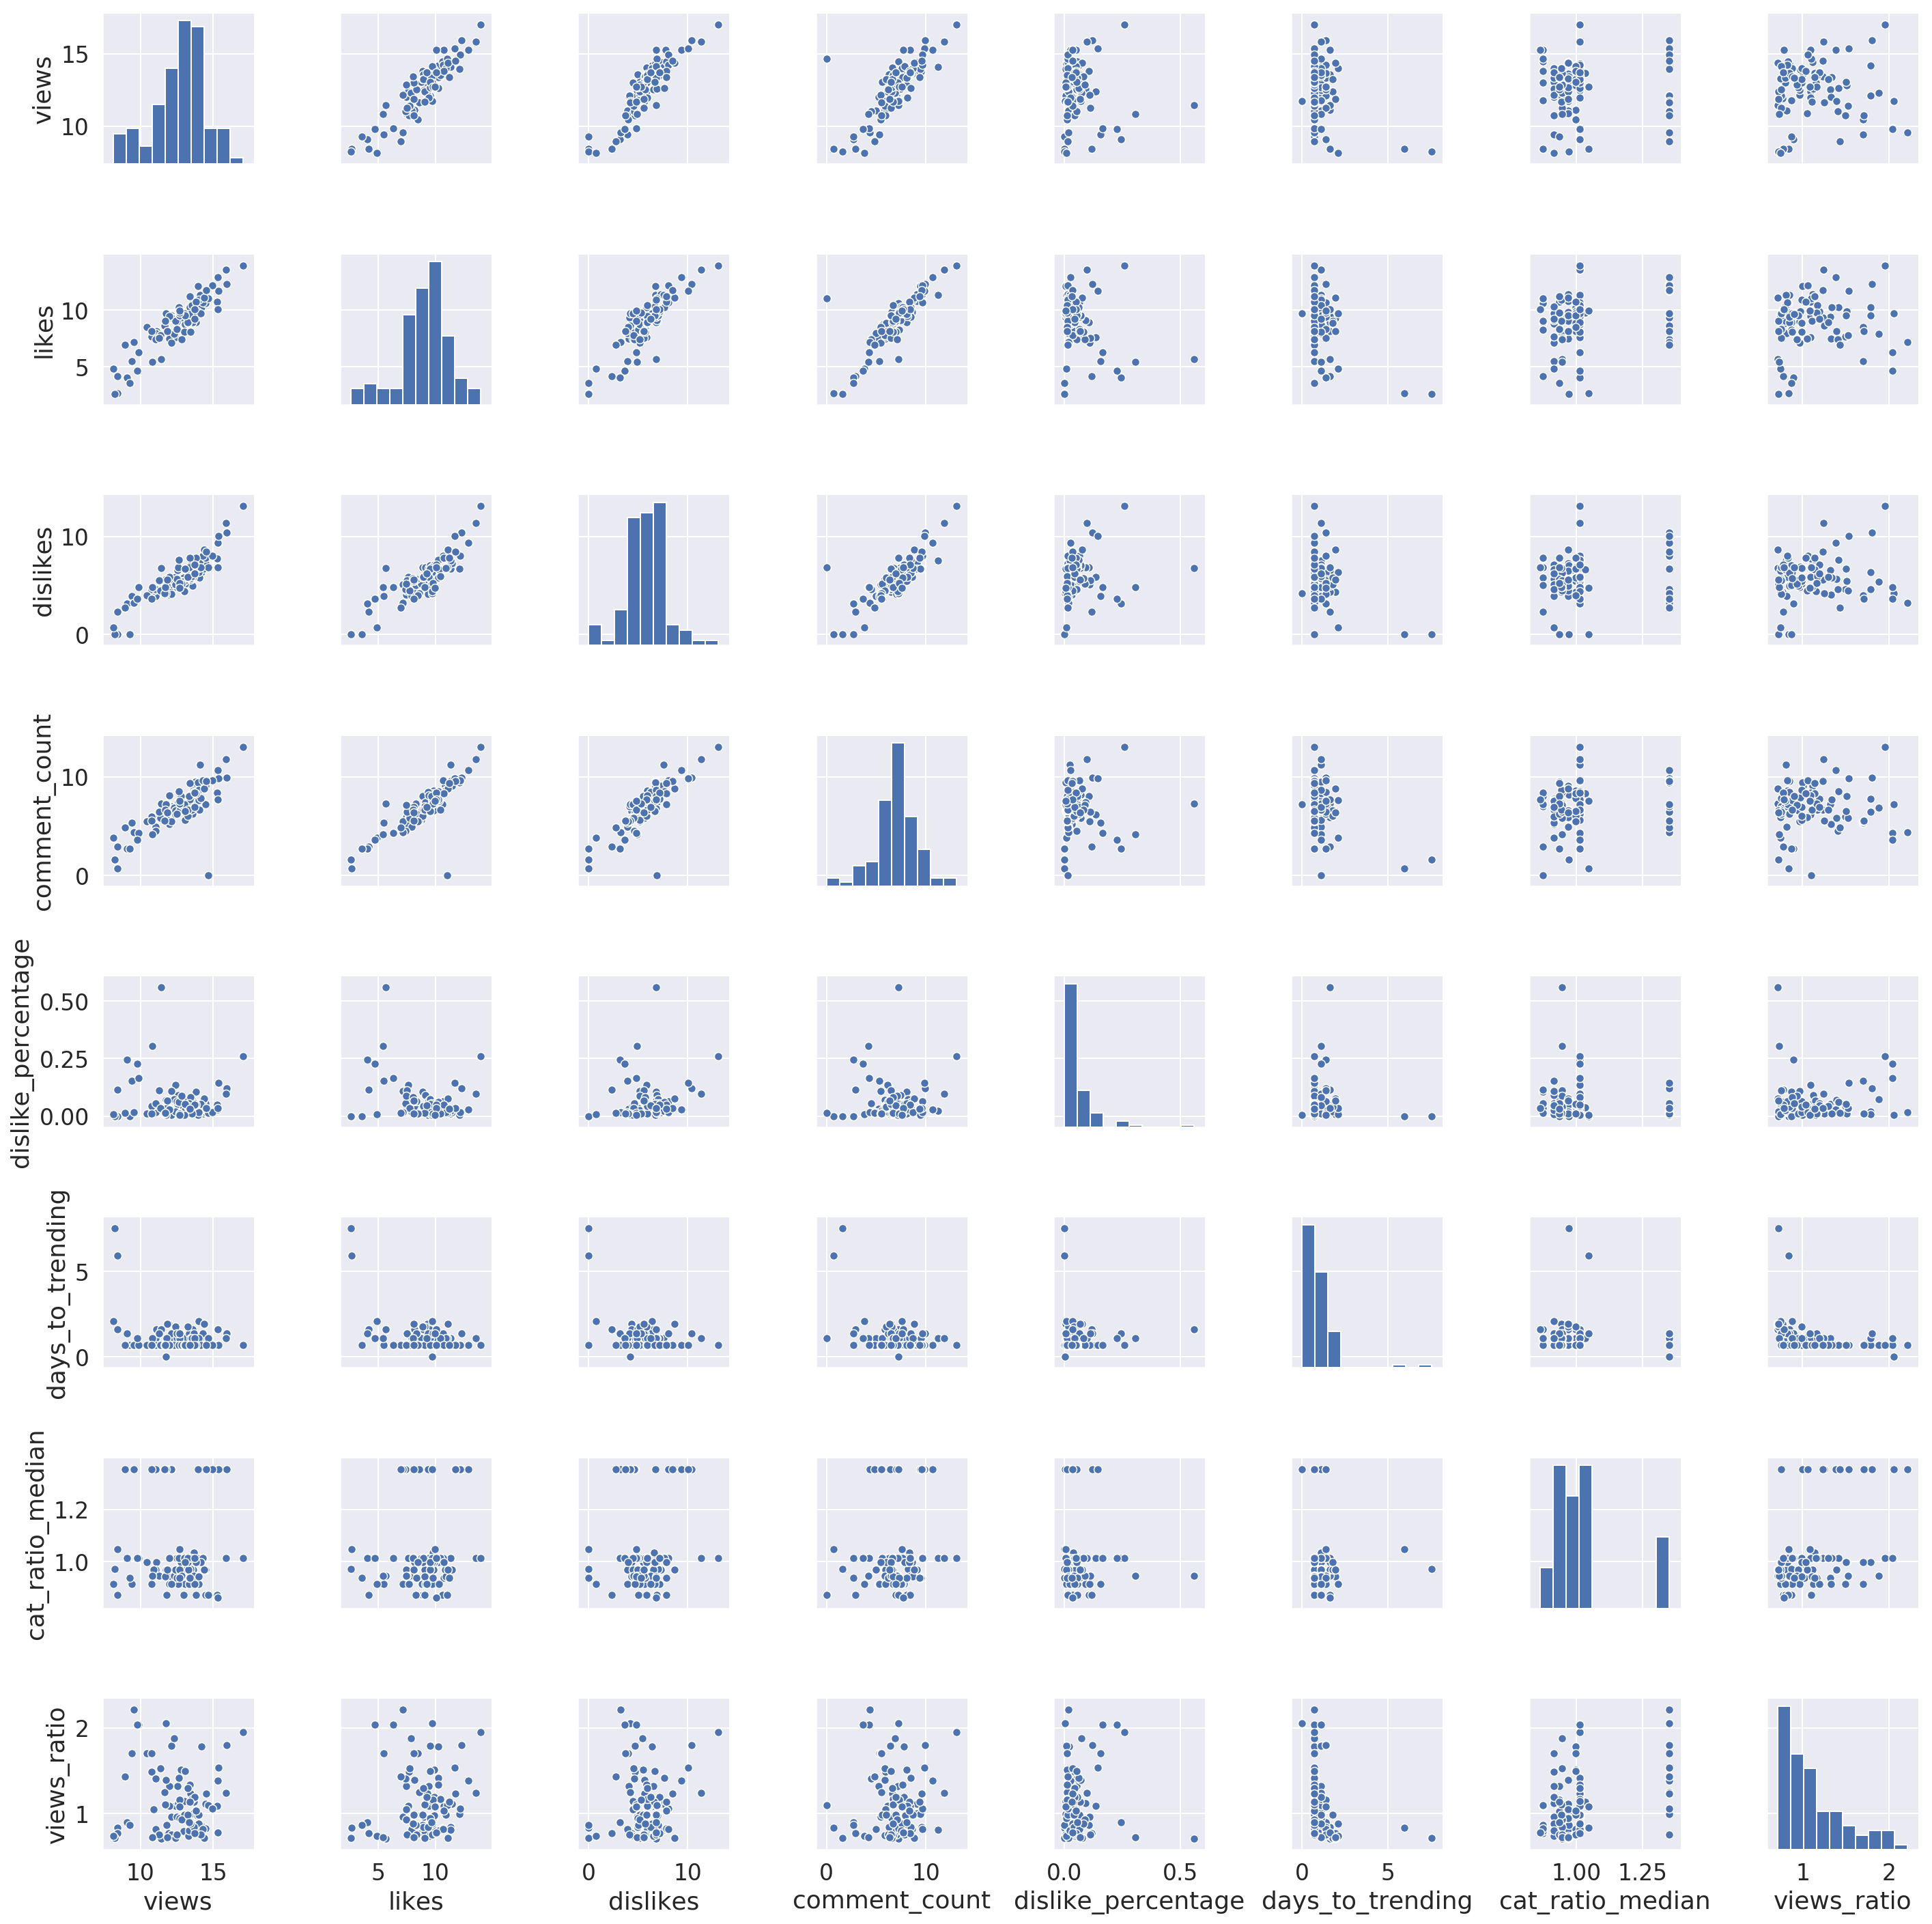

In [ ]:
_ = sns.pairplot(tmp_log.sample(100))

# Scikit Learn 


In [ ]:
#
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lars, Ridge

In [ ]:

regr_1 = DecisionTreeRegressor(max_depth=2,min_samples_leaf=.01)
regr_2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=.01)
regr_ols = LinearRegression()
regr_lrs = Lars()
regr_rdg = Ridge (alpha = .5)

In [ ]:
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_ols.fit(X_reg, y_reg)
regr_lrs.fit(X_reg, y_reg)
regr_rdg.fit(X_reg, y_reg)


NameError: ignored

In [ ]:
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_ols = regr_ols.predict(X_reg)
y_lrs = regr_lrs.predict(X_reg)
y_rdg = regr_rdg.predict(X_reg)

In [ ]:
print((y_1 - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('Regression Tree 1: R-sq = {:.2%}'.format(metrics.r2_score(y,y_1)))


print((y_ols - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('OLS: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_ols)))



print((y_lrs - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('LARS: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_lrs)))



print((y_rdg - y).describe(percentiles=[.05,.25,.5,.75,.95]))
print('Ridge Regression: R-sq = {:.2%}'.format(metrics.r2_score(y_reg,y_rdg)))

In [ ]:
# 참고: https://www.graphviz.org/
import graphviz 
dot_data = tree.export_graphviz(regr_1, out_file=None, feature_names=X.columns) 
graphviz.Source(dot_data)


In [ ]:
# Alternative Regression Tree with Bigger Depth
# Better Performance but More Difficult to Understand
print((y_2 - y).describe())
print('R-sq = {:.2%}'.format(metrics.r2_score(y,y_2)))
y_2_unique = pd.Series(pd.unique(y_2))


#print(pd.concat([y_2_unique.rename('y'),np.exp(y_2_unique).rename('exp(y)')],axis=1))
dot_data = tree.export_graphviz(regr_2, out_file=None, feature_names=X.columns) 
graphviz.Source(dot_data)

# Result

The first regression tree, regr_1, captures the main result. The key variable is days_to_treding, the lower it is the higher the expected views ratio (increase). For instant hits (days_to_trending <= 1) category is an additional predictor of future success, namely if a video belongs to the categories: "Film & Animation" or "Music."


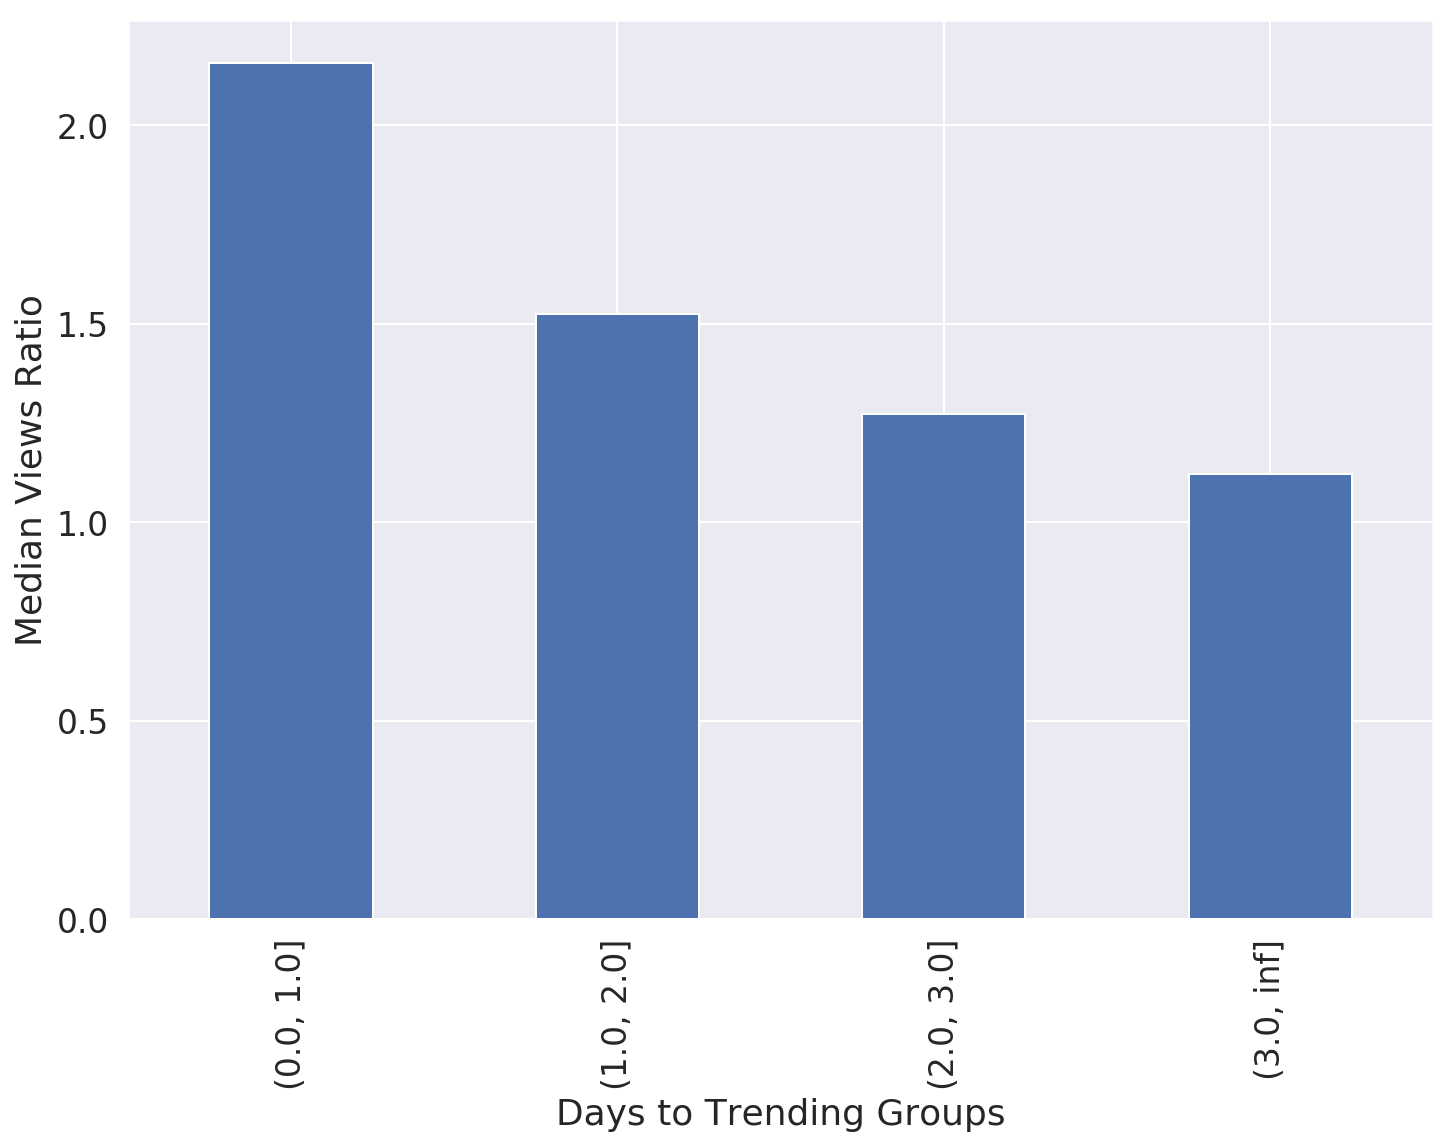

In [ ]:
days_to_trending_cat = pd.cut(video_level.days_to_trending,[0,1,2,3,np.inf])

ax = video_level.groupby(days_to_trending_cat)['views_ratio'].median().plot(kind='bar')
_ = ax.set(ylabel="Median Views Ratio",xlabel="Days to Trending Groups")

In [ ]:
# Categories with High Median Views Ratio
cat_ratio_median[cat_ratio_median > 1.837]

category
Film & Animation    1.901975
Music               2.869138
Pets & Animals      1.851116
Shows               1.874259
Name: views_ratio, dtype: float64